# Titanic Dataset

The sinking of the Titanic is one of the most infamous shipwrecks in history. 

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

### Data

Titanic DataSet obtained from Kaggle: https://www.kaggle.com/c/titanic

### Goal

Build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## 1.0 Setup

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [181]:
df = pd.read_csv('titanic_train.csv')
df_test = pd.read_csv('titanic_test.csv')

In [111]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## 2.0 Exploratory Data Analysis

In [17]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


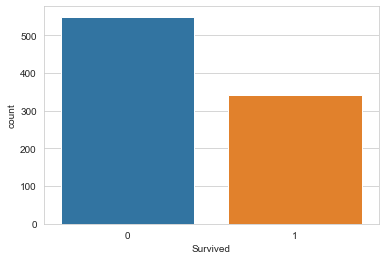

In [7]:
sns.set_style('whitegrid')

# Survived vs Did not Survive
sns.countplot(x='Survived', data=df)

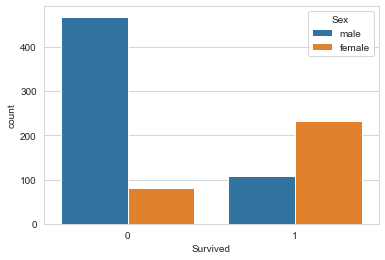

In [14]:
# Who survived relative to Sex
sns.countplot(x='Survived', hue = "Sex", data=df)

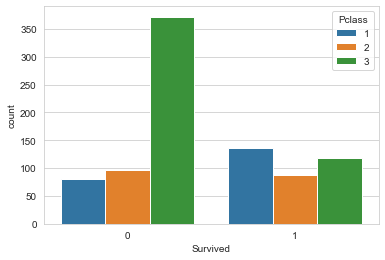

In [16]:
# Who survived based on passenger class?
sns.countplot(x='Survived', hue='Pclass', data=df)

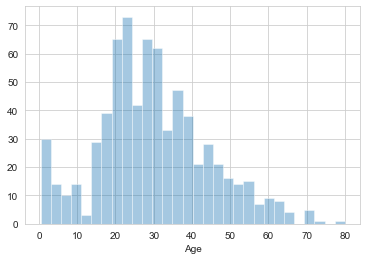

In [17]:
# Age distribution on the titanic
sns.distplot(df['Age'].dropna(), kde = False, bins=30)


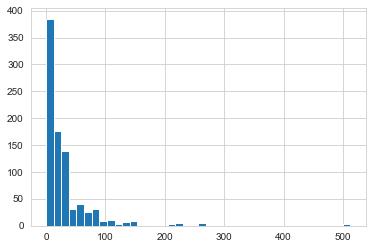

In [18]:
# What was the cost of fair distribution
df['Fare'].hist(bins=40)

In [182]:
#defining a function to determine who is a child (children are less than 16 yo.)
def male_female_child(passenger):
    #separating the two columns (sex and age) into two objects
    sex,age = passenger
    #checking if the age is < 16
    if age < 16:
        #setting the new value as 'child'
        return 'child'
    else:
        #setting the new value as the previous one
        return sex

In [183]:
#applying the male_female_child method to a new column called person by passing the sex and age columns
df['person'] = df[['Sex','Age']].apply(male_female_child,axis=1)
df_test['person'] = df_test[['Sex','Age']].apply(male_female_child,axis=1)

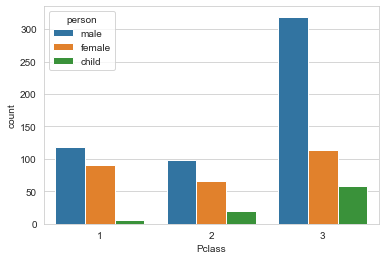

In [23]:
# The people in the classes
sns.countplot(x='Pclass', hue='person', data=df)

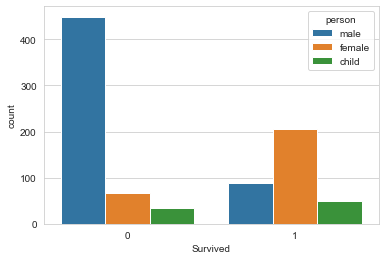

In [24]:
# The people in the classes
sns.countplot(x='Survived', hue='person', data=df)

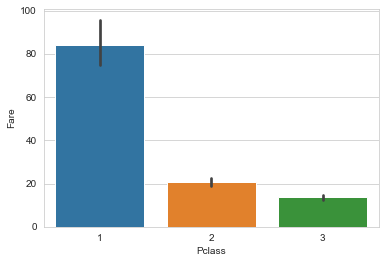

In [25]:
# Fare variation with Passenger Class
sns.barplot(x='Pclass',y='Fare',data=df)

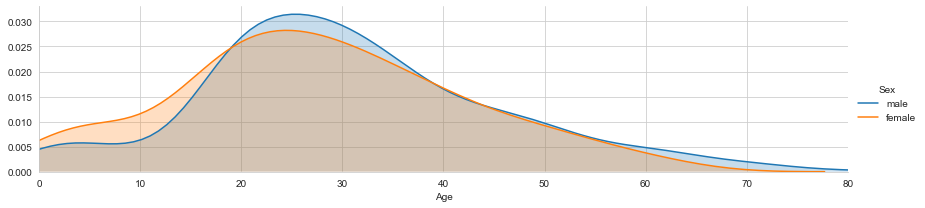

In [28]:
#creating a fig object and defining the data and the hue value
fig = sns.FacetGrid(df,hue='Sex',aspect=4)

#setting the plot type to a kde plot and the age column as the x axis
fig.map(sns.kdeplot,'Age',shade=True)

#getting the age of the oldest person in the dataset
oldest = df['Age'].max()

#setting the x axis limit
fig.set(xlim=(0,oldest))

#adding a legend to the plot
fig.add_legend()

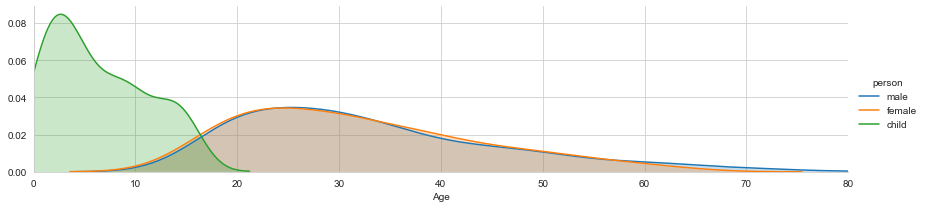

In [30]:
#creating a fig object and defining the data and the hue value
fig = sns.FacetGrid(df,hue='person',aspect=4)

#setting the plot type to a kde plot and the age column as the x axis
fig.map(sns.kdeplot,'Age',shade=True)

#getting the age of the oldest person in the dataset
oldest = df['Age'].max()

#setting the x axis limit
fig.set(xlim=(0,oldest))

#adding a legend to the plot
fig.add_legend()

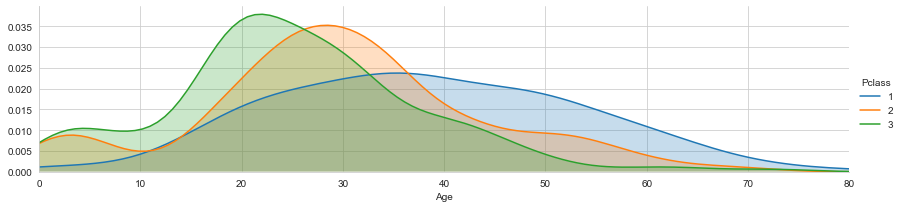

In [8]:
#creating a fig object and defining the data and the hue value
fig = sns.FacetGrid(df,hue='Pclass',aspect=4)

#setting the plot type to a kde plot and the age column as the x axis
fig.map(sns.kdeplot,'Age',shade=True)

#getting the age of the oldest person in the dataset
oldest = df['Age'].max()

#setting the x axis limit
fig.set(xlim=(0,oldest))

#adding a legend to the plot
fig.add_legend()

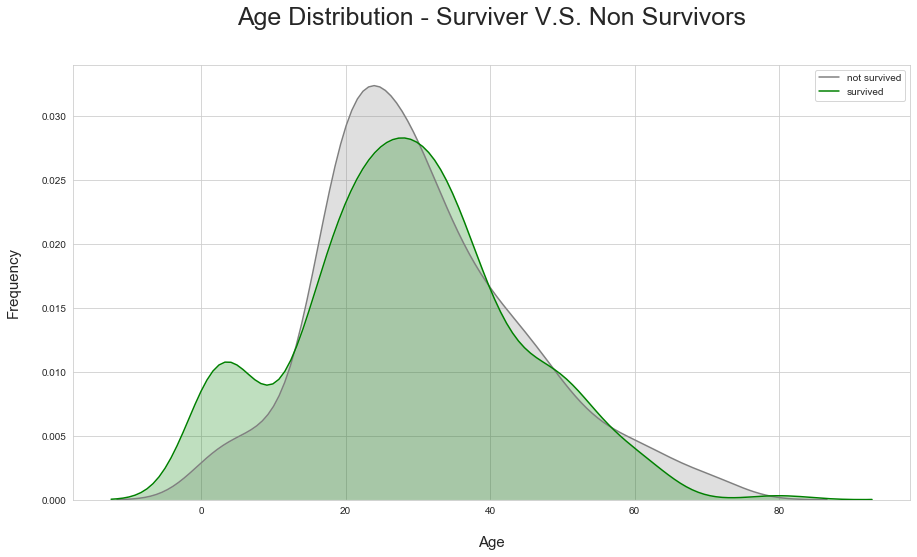

In [11]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(df.loc[(df['Survived'] == 0),'Age'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(df.loc[(df['Survived'] == 1),'Age'] , color='g',shade=True, label='survived')
plt.title('Age Distribution - Surviver V.S. Non Survivors', fontsize = 25, pad = 40)
plt.xlabel("Age", fontsize = 15, labelpad = 20)
plt.ylabel('Frequency', fontsize = 15, labelpad= 20);

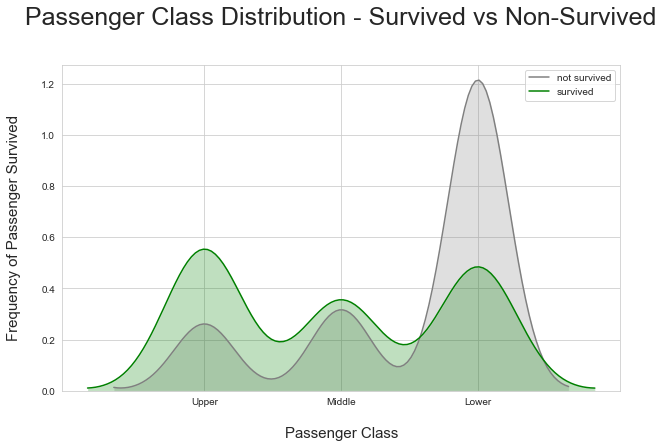

In [15]:
# Kernel Density Plot
fig = plt.figure(figsize=(10,6),)
## I have included to different ways to code a plot below, choose the one that suites you. 
ax=sns.kdeplot(df.Pclass[df.Survived == 0] , 
               color='gray',
               shade=True,
               label='not survived')
ax=sns.kdeplot(df.loc[(df['Survived'] == 1),'Pclass'] , 
               color='g',
               shade=True, 
               label='survived', 
              )
plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Passenger Class", fontsize = 15,labelpad =20)
## Converting xticks into words for better understanding
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(df.Pclass.unique()), labels);

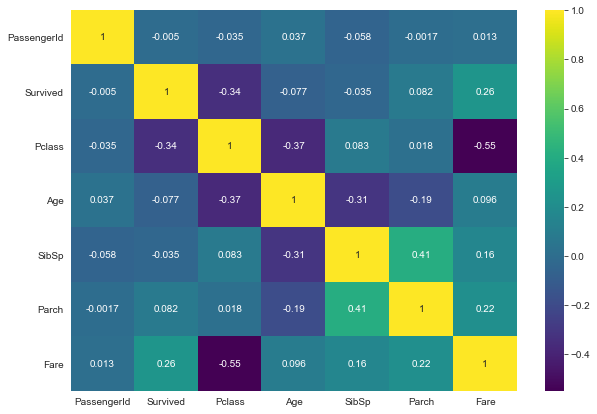

In [16]:
# Correlation between the feature variables
correlation = df.corr()

# A heatmap visulisation of the correlation between features

plt.figure(figsize = (10,7))
sns.heatmap(correlation, annot = True, cmap='viridis')

## 3.0 Data Pre-Processing

### 3.1 Missing Data

In [123]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

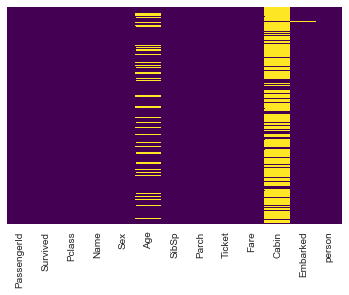

In [36]:
# Visualise missing data
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [47]:
# We can impute the missing age data by taking the average ages from the passenger class
df.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [184]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25
    
    return Age

In [185]:
df['Age'] = df[['Age','Pclass']].apply(impute_age, axis=1)
df_test['Age'] = df_test[['Age','Pclass']].apply(impute_age, axis=1)

In [186]:
#df.isnull().sum()


In [187]:
# There is too much missing cabin data and no way to complete the missing, therefore the feature is dropped
df.drop('Cabin', axis=1, inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)

In [188]:
# The two missing embarked examples can be removed
df = df.dropna()

In [189]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
person         0
dtype: int64

In [190]:
df_test.groupby('Pclass')['Fare'].mean()

Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64

In [191]:
# What is the Passenger class for the missing fare
df_test[df_test['Fare'].isnull() == True]['Pclass']


152    3
Name: Pclass, dtype: int64

In [192]:
df_test['Fare'].iloc[152]

nan

In [193]:
# Update cell with mean of fare for class 3
df_test.at[152, 'Fare'] = 12.459

In [194]:
df_test['Fare'].iloc[152]

12.459

In [195]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
person         0
dtype: int64

### 3.2 Feature Engineering

In [196]:
# Create family size feature

df['family_size'] = df.SibSp + df.Parch+1
df_test['family_size'] = df_test.SibSp + df_test.Parch+1

In [197]:
def family_group(size):
    a = ''
    if (size <= 1):
        a = 'loner'
    elif (size <= 4):
        a = 'small'
    else:
        a = 'large'
    return a

In [198]:
df['family_group'] = df['family_size'].map(family_group)
df_test['family_group'] = df_test['family_size'].map(family_group)

In [199]:
#Create column to indicating if the passenger is alone

df['is_alone'] = [1 if i<2 else 0 for i in df.family_size]
df_test['is_alone'] = [1 if i<2 else 0 for i in df_test.family_size]

In [200]:
## Calculating fare based on family size.  people have travelled in groups like family or friends. 
# It seems like Fare column kept a record of the total fare rather than the fare of individual passenger, 
# therefore calculated fare will be much handy in this situation.

df['calculated_fare'] = df.Fare/df.family_size
df_test['calculated_fare'] = df_test.Fare/df_test.family_size

In [201]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,person,family_size,family_group,is_alone,calculated_fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,male,2,small,0,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,female,2,small,0,35.64165


### 3.3 Categorical and Dummy Variables

In [202]:
# Convert Sex and Embarked data to numerical/dummy data
sex = pd.get_dummies(df['Sex'], drop_first=True)
embark = pd.get_dummies(df['Embarked'], drop_first=False)
persons = pd.get_dummies(df['person'], drop_first=False)
family_group = pd.get_dummies(df['family_group'], drop_first=False)

sex_test = pd.get_dummies(df_test['Sex'], drop_first=True)
embark_test = pd.get_dummies(df_test['Embarked'], drop_first=False)
persons_test = pd.get_dummies(df_test['person'], drop_first=False)
family_group_test = pd.get_dummies(df_test['family_group'], drop_first=False)

In [203]:
# Concatenate on to df
df = pd.concat([df,sex,embark,persons,family_group], axis = 1)
df_test = pd.concat([df_test,sex_test,embark_test,persons_test,family_group_test], axis = 1)

In [204]:
df.drop(['Sex','Embarked','PassengerId','Name','Ticket','Fare','family_size','person','family_group'], axis=1, inplace=True)
df_test.drop(['Sex','Embarked','PassengerId','Name','Ticket','Fare','family_size','person','family_group'], axis=1, inplace=True)

In [205]:
df.head(2)

,Survived,Pclass,Age,SibSp,Parch,is_alone,calculated_fare,male,C,Q,S,child,female,male,large,loner,small
0,0,3,22.0,1,0,0,3.62500,1,0,0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,0,35.64165,0,1,0,0,0,1,0,0,0,1


In [206]:
df_test.head(2)

,Pclass,Age,SibSp,Parch,is_alone,calculated_fare,male,C,Q,S,child,female,male,large,loner,small
0,3,34.5,0,0,1,7.8292,1,0,1,0,0,0,1,0,1,0
1,3,47.0,1,0,0,3.5000,0,0,0,1,0,1,0,0,0,1


# 4.0 Model Building

### 4.1 Train Test Split

In [213]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X.head()

,Pclass,Age,SibSp,Parch,is_alone,calculated_fare,male,C,Q,S,child,female,male,large,loner,small
0,3,22.0,1,0,0,3.62500,1,0,0,1,0,0,1,0,0,1
1,1,38.0,1,0,0,35.64165,0,1,0,0,0,1,0,0,0,1
2,3,26.0,0,0,1,7.92500,0,0,0,1,0,1,0,0,1,0
3,1,35.0,1,0,0,26.55000,0,0,0,1,0,1,0,0,0,1
4,3,35.0,0,0,1,8.05000,1,0,0,1,0,0,1,0,1,0


In [215]:
X_test_kaggle = df_test
X_test_kaggle.head()

,Pclass,Age,SibSp,Parch,is_alone,calculated_fare,male,C,Q,S,child,female,male,large,loner,small
0,3,34.5,0,0,1,7.829200,1,0,1,0,0,0,1,0,1,0
1,3,47.0,1,0,0,3.500000,0,0,0,1,0,1,0,0,0,1
2,2,62.0,0,0,1,9.687500,1,0,1,0,0,0,1,0,1,0
3,3,27.0,0,0,1,8.662500,1,0,0,1,0,0,1,0,1,0
4,3,22.0,1,1,0,4.095833,0,0,0,1,0,1,0,0,0,1


In [290]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .33, random_state=0)

### 4.2 Feature Scaling

In [217]:
# Feature Scaling
## We will be using standardscaler to transform
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

## transforming "train_x"
X_train = sc.fit_transform(X_train)
## transforming "test_x"
X_test = sc.transform(X_test)
## transforming "test_x"
X_test_kaggle = sc.transform(X_test_kaggle)

In [218]:
X_train

array([[ 0.8298822 , -1.85763918,  3.06359711, ...,  3.45467547,
        -1.25974463, -0.66909533],
       [ 0.8298822 ,  0.7984623 ,  0.41283567, ..., -0.28946279,
        -1.25974463,  1.49455534],
       [ 0.8298822 ,  0.06065633,  0.41283567, ..., -0.28946279,
        -1.25974463,  1.49455534],
       ...,
       [-1.59060754,  3.74968616, -0.47075147, ..., -0.28946279,
         0.79381168, -0.66909533],
       [ 0.8298822 , -0.30824665, -0.47075147, ..., -0.28946279,
         0.79381168, -0.66909533],
       [-0.38036267, -0.30824665,  0.41283567, ..., -0.28946279,
        -1.25974463,  1.49455534]])

In [219]:
X_test

array([[ 0.8298822 , -1.11983321, -0.47075147, ..., -0.28946279,
         0.79381168, -0.66909533],
       [ 0.8298822 , -0.30824665,  6.5979457 , ...,  3.45467547,
        -1.25974463, -0.66909533],
       [-1.59060754,  0.50333991,  0.41283567, ..., -0.28946279,
        -1.25974463,  1.49455534],
       ...,
       [-1.59060754,  0.7984623 , -0.47075147, ..., -0.28946279,
         0.79381168, -0.66909533],
       [ 0.8298822 , -0.52958844, -0.47075147, ..., -0.28946279,
         0.79381168, -0.66909533],
       [-1.59060754,  1.46248766,  0.41283567, ..., -0.28946279,
        -1.25974463,  1.49455534]])

In [220]:
X_test_kaggle

array([[ 0.8298822 ,  0.39266901, -0.47075147, ..., -0.28946279,
         0.79381168, -0.66909533],
       [ 0.8298822 ,  1.31492647,  0.41283567, ..., -0.28946279,
        -1.25974463,  1.49455534],
       [-0.38036267,  2.42163542, -0.47075147, ..., -0.28946279,
         0.79381168, -0.66909533],
       ...,
       [ 0.8298822 ,  0.6877914 , -0.47075147, ..., -0.28946279,
         0.79381168, -0.66909533],
       [ 0.8298822 , -0.30824665, -0.47075147, ..., -0.28946279,
         0.79381168, -0.66909533],
       [ 0.8298822 , -0.30824665,  0.41283567, ..., -0.28946279,
        -1.25974463,  1.49455534]])

### 4.2 Create Basic SVM Model

In [221]:
from sklearn.svm import SVC

In [222]:
model = SVC()

In [223]:
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [147]:
predictions = model.predict(X_test)

### 4.3 Evaluate Basic Model Performance

In [93]:
from sklearn.metrics import classification_report, confusion_matrix

In [94]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       174
           1       0.77      0.70      0.73       120

    accuracy                           0.79       294
   macro avg       0.79      0.78      0.78       294
weighted avg       0.79      0.79      0.79       294



In [97]:
print(confusion_matrix(y_test,predictions))

[[149  25]
 [ 36  84]]


### 4.4 Create GridSearch SVM Model

In [224]:
from sklearn.model_selection import GridSearchCV,StratifiedShuffleSplit

In [225]:
param_grid = {'C': [0.001, 0.01, 0.1, 1,1.5,2,2.5,3,4,5, 10], 'gamma': [0.0001,0.001, 0.01, 0.1, 1]}

In [226]:
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
grid_search = GridSearchCV(SVC(kernel = 'rbf', probability=True), param_grid, verbose=3, cv=cv) ## 'rbf' stands for gaussian kernel
grid_search.fit(X,y)

Fitting 10 folds for each of 55 candidates, totalling 550 fits
[CV] C=0.001, gamma=0.0001 ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............... C=0.001, gamma=0.0001, score=0.618, total=   0.3s
[CV] C=0.001, gamma=0.0001 ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ............... C=0.001, gamma=0.0001, score=0.618, total=   0.3s
[CV] C=0.001, gamma=0.0001 ...........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] ............... C=0.001, gamma=0.0001, score=0.618, total=   0.3s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] ............... C=0.001, gamma=0.0001, score=0.618, total=   0.3s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] ............... C=0.001, gamma=0.0001, score=0.618, total=   0.3s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] ............... C=0.001, gamma=0.0001, score=0.618, total=   0.2s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] ............... C=0.001, gamma=0.0001, score=0.618, total=   0.2s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] ............... C=0.001, gamma=0.0001, score=0.618, total=   0.2s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] ............... C=0.001, gamma=0.0001, score=0.618, total=   0.2s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] .

[CV] ................. C=0.01, gamma=0.001, score=0.618, total=   0.2s
[CV] C=0.01, gamma=0.001 .............................................
[CV] ................. C=0.01, gamma=0.001, score=0.618, total=   0.2s
[CV] C=0.01, gamma=0.001 .............................................
[CV] ................. C=0.01, gamma=0.001, score=0.618, total=   0.2s
[CV] C=0.01, gamma=0.001 .............................................
[CV] ................. C=0.01, gamma=0.001, score=0.618, total=   0.2s
[CV] C=0.01, gamma=0.001 .............................................
[CV] ................. C=0.01, gamma=0.001, score=0.618, total=   0.2s
[CV] C=0.01, gamma=0.001 .............................................
[CV] ................. C=0.01, gamma=0.001, score=0.618, total=   0.2s
[CV] C=0.01, gamma=0.001 .............................................
[CV] ................. C=0.01, gamma=0.001, score=0.618, total=   0.2s
[CV] C=0.01, gamma=0.001 .............................................
[CV] .

[CV] .................. C=0.1, gamma=0.001, score=0.697, total=   0.3s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.670, total=   0.3s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.659, total=   0.3s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.682, total=   0.3s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.685, total=   0.3s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.689, total=   0.3s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.659, total=   0.3s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[CV] ..................... C=1, gamma=0.01, score=0.775, total=   0.2s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.742, total=   0.2s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.779, total=   0.2s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.772, total=   0.2s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.772, total=   0.3s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.738, total=   0.3s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.749, total=   0.3s
[CV] C=1, gamma=0.1 ..................................................
[CV] .

[CV] .................... C=1.5, gamma=0.1, score=0.727, total=   0.3s
[CV] C=1.5, gamma=0.1 ................................................
[CV] .................... C=1.5, gamma=0.1, score=0.775, total=   0.3s
[CV] C=1.5, gamma=0.1 ................................................
[CV] .................... C=1.5, gamma=0.1, score=0.760, total=   0.3s
[CV] C=1.5, gamma=0.1 ................................................
[CV] .................... C=1.5, gamma=0.1, score=0.723, total=   0.2s
[CV] C=1.5, gamma=0.1 ................................................
[CV] .................... C=1.5, gamma=0.1, score=0.768, total=   0.3s
[CV] C=1.5, gamma=0.1 ................................................
[CV] .................... C=1.5, gamma=0.1, score=0.715, total=   0.3s
[CV] C=1.5, gamma=1 ..................................................
[CV] ...................... C=1.5, gamma=1, score=0.663, total=   0.3s
[CV] C=1.5, gamma=1 ..................................................
[CV] .

[CV] ........................ C=2, gamma=1, score=0.652, total=   0.5s
[CV] C=2, gamma=1 ....................................................
[CV] ........................ C=2, gamma=1, score=0.670, total=   0.6s
[CV] C=2, gamma=1 ....................................................
[CV] ........................ C=2, gamma=1, score=0.644, total=   0.7s
[CV] C=2, gamma=1 ....................................................
[CV] ........................ C=2, gamma=1, score=0.678, total=   0.7s
[CV] C=2, gamma=1 ....................................................
[CV] ........................ C=2, gamma=1, score=0.648, total=   0.7s
[CV] C=2, gamma=1 ....................................................
[CV] ........................ C=2, gamma=1, score=0.648, total=   0.7s
[CV] C=2, gamma=1 ....................................................
[CV] ........................ C=2, gamma=1, score=0.689, total=   0.6s
[CV] C=2, gamma=1 ....................................................
[CV] .

[CV] ................... C=3, gamma=0.0001, score=0.652, total=   0.1s
[CV] C=3, gamma=0.0001 ...............................................
[CV] ................... C=3, gamma=0.0001, score=0.704, total=   0.1s
[CV] C=3, gamma=0.0001 ...............................................
[CV] ................... C=3, gamma=0.0001, score=0.685, total=   0.2s
[CV] C=3, gamma=0.0001 ...............................................
[CV] ................... C=3, gamma=0.0001, score=0.670, total=   0.1s
[CV] C=3, gamma=0.0001 ...............................................
[CV] ................... C=3, gamma=0.0001, score=0.659, total=   0.1s
[CV] C=3, gamma=0.0001 ...............................................
[CV] ................... C=3, gamma=0.0001, score=0.674, total=   0.2s
[CV] C=3, gamma=0.0001 ...............................................
[CV] ................... C=3, gamma=0.0001, score=0.678, total=   0.1s
[CV] C=3, gamma=0.0001 ...............................................
[CV] .

[CV] ................... C=4, gamma=0.0001, score=0.678, total=   0.2s
[CV] C=4, gamma=0.001 ................................................
[CV] .................... C=4, gamma=0.001, score=0.798, total=   0.2s
[CV] C=4, gamma=0.001 ................................................
[CV] .................... C=4, gamma=0.001, score=0.749, total=   0.2s
[CV] C=4, gamma=0.001 ................................................
[CV] .................... C=4, gamma=0.001, score=0.775, total=   0.3s
[CV] C=4, gamma=0.001 ................................................
[CV] .................... C=4, gamma=0.001, score=0.779, total=   0.3s
[CV] C=4, gamma=0.001 ................................................
[CV] .................... C=4, gamma=0.001, score=0.723, total=   0.2s
[CV] C=4, gamma=0.001 ................................................
[CV] .................... C=4, gamma=0.001, score=0.764, total=   0.2s
[CV] C=4, gamma=0.001 ................................................
[CV] .

[CV] .................... C=5, gamma=0.001, score=0.813, total=   0.2s
[CV] C=5, gamma=0.001 ................................................
[CV] .................... C=5, gamma=0.001, score=0.790, total=   0.2s
[CV] C=5, gamma=0.01 .................................................
[CV] ..................... C=5, gamma=0.01, score=0.798, total=   0.2s
[CV] C=5, gamma=0.01 .................................................
[CV] ..................... C=5, gamma=0.01, score=0.749, total=   0.2s
[CV] C=5, gamma=0.01 .................................................
[CV] ..................... C=5, gamma=0.01, score=0.783, total=   0.2s
[CV] C=5, gamma=0.01 .................................................
[CV] ..................... C=5, gamma=0.01, score=0.828, total=   0.2s
[CV] C=5, gamma=0.01 .................................................
[CV] ..................... C=5, gamma=0.01, score=0.783, total=   0.2s
[CV] C=5, gamma=0.01 .................................................
[CV] .

[CV] .................... C=10, gamma=0.01, score=0.798, total=   0.2s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.764, total=   0.2s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.787, total=   0.3s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.779, total=   0.2s
[CV] C=10, gamma=0.1 .................................................
[CV] ..................... C=10, gamma=0.1, score=0.742, total=   0.4s
[CV] C=10, gamma=0.1 .................................................
[CV] ..................... C=10, gamma=0.1, score=0.697, total=   0.3s
[CV] C=10, gamma=0.1 .................................................
[CV] ..................... C=10, gamma=0.1, score=0.727, total=   0.3s
[CV] C=10, gamma=0.1 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done 550 out of 550 | elapsed:  3.0min finished


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
#grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [158]:
#grid.fit(X,y)

In [227]:
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

0.8093632958801498
{'C': 10, 'gamma': 0.001}
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [228]:
# using the best found hyper paremeters to get the score. 
svm_grid = grid_search.best_estimator_
svm_grid.score(X,y)

0.8256467941507312

In [229]:
grid_predictions = grid.predict(X_test)

In [230]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       174
           1       0.77      0.70      0.73       120

    accuracy                           0.79       294
   macro avg       0.79      0.78      0.78       294
weighted avg       0.79      0.79      0.79       294



In [231]:
print(confusion_matrix(y_test,grid_predictions))

[[149  25]
 [ 36  84]]


In [240]:
kaggle_predictions = grid.predict(X_test_kaggle)

In [233]:
df_test_for_passengerId = pd.read_csv('titanic_test.csv')

In [271]:
df_test_for_passengerId['PassengerId']

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [ ]:
kaggle_predictions = grid.predict(X_test_kaggle)

In [322]:
df_kaggle_predictions = pd.DataFrame(kaggle_predictions)

In [237]:
df_kaggle_predictions.insert(0,column='PassengerId', value=df_test_for_passengerId['PassengerId'].values)

In [238]:
df_kaggle_predictions.rename(columns = {0:'Survived'}, inplace = True)

In [239]:
df_kaggle_predictions.to_csv('Titanic_Predictions_SVM_MRG')
df_kaggle_predictions.head(2)

,PassengerId,Survived
0,892,0
1,893,1
